In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score, roc_curve, roc_auc_score

# Data Cleaning

In [2]:
df = pd.read_csv('titanic3.csv')
df = df.drop(columns=['name','ticket','cabin','boat','body','home.dest'])
df['sex'].replace({'female':0,'male':1},inplace=True) # female: 0 , male: 1
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
train_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
701,3.0,0.0,1.0,17.0,0.0,0.0,8.6625,S
994,3.0,0.0,1.0,NaN,0.0,0.0,7.2292,C
350,2.0,1.0,0.0,15.0,0.0,2.0,39.0000,S
986,3.0,0.0,1.0,22.0,0.0,0.0,7.1250,S
409,2.0,0.0,1.0,36.0,0.0,0.0,13.0000,S
...,...,...,...,...,...,...,...,...
180,1.0,1.0,0.0,39.0,0.0,0.0,211.3375,S
301,1.0,0.0,1.0,47.0,0.0,0.0,34.0208,S
496,2.0,0.0,1.0,30.0,0.0,0.0,13.0000,S
1132,3.0,0.0,1.0,NaN,0.0,0.0,7.8958,S


In [3]:
train_df['survived'] = train_df['survived'].fillna(train_df['survived'].mode()[0])
train_df['sex'] = train_df['sex'].fillna(train_df['sex'].mode()[0])
train_df['age'] = train_df['age'].fillna(train_df['age'].mean())
train_df['sibsp'] = train_df['sibsp'].fillna(train_df['sibsp'].mean())
train_df['parch'] = train_df['parch'].fillna(train_df['parch'].mean())
train_df['fare'] = train_df['fare'].fillna(train_df['fare'].mean())
train_df['pclass'] = train_df['pclass'].fillna(train_df['pclass'].mode()[0])
train_df['embarked'] = train_df['embarked'].fillna(train_df['embarked'].mode()[0])
train_df = pd.get_dummies(train_df, columns=['embarked'])
train_df = pd.get_dummies(train_df, columns=['pclass'])
train_df

,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1.0,pclass_2.0,pclass_3.0
701,0.0,1.0,17.000000,0.0,0.0,8.6625,False,False,True,False,False,True
994,0.0,1.0,30.004172,0.0,0.0,7.2292,True,False,False,False,False,True
350,1.0,0.0,15.000000,0.0,2.0,39.0000,False,False,True,False,True,False
986,0.0,1.0,22.000000,0.0,0.0,7.1250,False,False,True,False,False,True
409,0.0,1.0,36.000000,0.0,0.0,13.0000,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.0,0.0,39.000000,0.0,0.0,211.3375,False,False,True,True,False,False
301,0.0,1.0,47.000000,0.0,0.0,34.0208,False,False,True,True,False,False
496,0.0,1.0,30.000000,0.0,0.0,13.0000,False,False,True,False,True,False
1132,0.0,1.0,30.004172,0.0,0.0,7.8958,False,False,True,False,False,True


In [4]:
test_df['survived'] = test_df['survived'].fillna(test_df['survived'].mode()[0])
test_df['sex'] = test_df['sex'].fillna(test_df['sex'].mode()[0])
test_df['age'] = test_df['age'].fillna(test_df['age'].mean())
test_df['sibsp'] = test_df['sibsp'].fillna(test_df['sibsp'].mean())
test_df['parch'] = test_df['parch'].fillna(test_df['parch'].mean())
test_df['fare'] = test_df['fare'].fillna(test_df['fare'].mean())
test_df['pclass'] = test_df['pclass'].fillna(test_df['pclass'].mode()[0])
test_df['embarked'] = test_df['embarked'].fillna(test_df['embarked'].mode()[0])
test_df = pd.get_dummies(test_df, columns=['embarked'])
test_df = pd.get_dummies(test_df, columns=['pclass'])
test_df

,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1.0,pclass_2.0,pclass_3.0
1,1.0,1.0,0.916700,1.0,2.0,151.5500,False,False,True,True,False,False
8,1.0,0.0,53.000000,2.0,0.0,51.4792,False,False,True,True,False,False
13,1.0,0.0,26.000000,0.0,0.0,78.8500,False,False,True,True,False,False
14,1.0,1.0,80.000000,0.0,0.0,30.0000,False,False,True,True,False,False
16,0.0,1.0,24.000000,0.0,1.0,247.5208,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1.0,1.0,22.000000,0.0,0.0,7.2250,True,False,False,False,False,True
1287,0.0,1.0,51.000000,0.0,0.0,7.7500,False,False,True,False,False,True
1290,1.0,0.0,47.000000,1.0,0.0,7.0000,False,False,True,False,False,True
1294,0.0,1.0,28.500000,0.0,0.0,16.1000,False,False,True,False,False,True


In [5]:
df = pd.concat([train_df, test_df])
x = df.drop('survived', axis=1)
y = df['survived']

x_train = train_df.drop('survived', axis=1)
y_train = train_df['survived']

x_test = test_df.drop('survived', axis=1)
y_test = test_df['survived']

In [6]:
#sns.pairplot(data=df, hue='survived', palette={0: 'blue', 1: 'orange'}, height=10)
#plt.show()

## KNN

In [7]:
best_score = 0
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
print(f'The best K is {best_k} with a cross validation score of {best_score}')

The best K is 20 with a cross validation score of 0.7061289587605378


In [57]:
# function for assessing model
def assessment(model, x, y, model_name):
    if model_name in ['Log Reg','L1 Log Reg']:
        y_pred_prob = model.predict_proba(x_test)[:, 1]
        y_pred = (y_pred_prob >= 0.5).astype(int)
    else:
        y_pred = model.predict(x)
        
    accuracy = accuracy_score(y,y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    assessmentDF = pd.DataFrame({'Metric':['Accuracy','Precision','Recall','F1 Score'], 
                                 model_name:[round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]})
    return assessmentDF

In [50]:
knn = neighbors.KNeighborsClassifier(n_neighbors=21, metric="euclidean")
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [12]:
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
cv = StratifiedKFold(n_splits=5)
rfecv = RFECV(estimator=model, cv=cv, scoring='accuracy')
rfecv.fit(x, y)
cross_val_scores = cross_val_score(model, x, y, cv=cv)
    
selected_features = {'selected_features': x.columns[rfecv.support_], 'score': cross_val_scores.mean()}
selected_features

{'selected_features': Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_C', 'embarked_Q',
        'embarked_S', 'pclass_1.0', 'pclass_2.0', 'pclass_3.0'],
       dtype='object'),
 'score': 0.7877862595419847}

In [58]:
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

## L1 Penalized Logistic Regression

In [59]:
L1_log_reg_model = LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')
L1_log_reg_model.fit(x_train,y_train)

LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')

## XGBoost Classification

In [17]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)


In [18]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [19]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
param_grid = {'alpha': np.arange(1,4,0.2)}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_alpha

3.5999999999999996

In [45]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", alpha = best_alpha)
xgb_model.fit(x_train, y_train)

XGBClassifier(alpha=0.05263157894736842, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
tree = DecisionTreeClassifier()
alphas = np.linspace(0, 1, 20)
param_grid = {'ccp_alpha': alphas}
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x, y)
best_alpha = grid_search.best_params_['ccp_alpha']
print(f'Best alpha: {best_alpha:.2f}')
print(f'Mean Accuracy: {grid_search.best_score_:.2f}')

Best alpha: 0.05
Mean Accuracy: 0.78


Decision Tree for the whole Titanic data


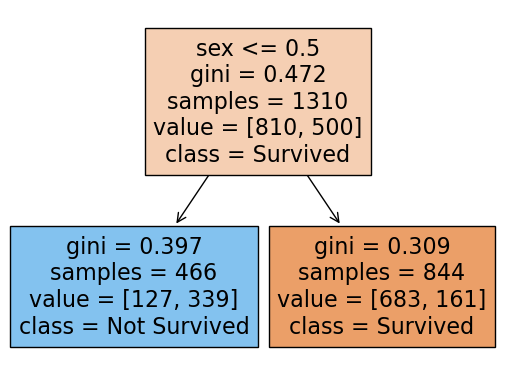

In [25]:
tree = DecisionTreeClassifier(ccp_alpha=0.05)
model = tree.fit(x, y)
plot_tree(model, filled=True, feature_names=x.columns.tolist(), class_names=['Survived', 'Not Survived'])
print('Decision Tree for the whole Titanic data')
plt.show()

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rdm_forest = RandomForestClassifier(max_depth=20, random_state=13, oob_score=True)
rdm_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, oob_score=True, random_state=13)

## SVM

In [28]:
from sklearn.svm import SVC

In [29]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],  # SVM penalty
              'gamma': np.arange(1, 2.1, 0.1)}  # Gaussian Kernel

svm_modelCV = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring='accuracy')
svm_modelCV.fit(x_train, y_train)

best_C = svm_modelCV.best_params_['C']
best_gamma= svm_modelCV.best_params_['gamma']
print(best_C)
print(best_gamma)

1
1.1


In [48]:
svm_model = SVC(kernel='rbf', C=best_C,  gamma=best_gamma)
svm_model.fit(x_train, y_train)

SVC(C=1, gamma=1.1)

# Results

In [63]:
tables = [assessment(knn, x_test, y_test, 'KNN'),
          assessment(log_reg_model, x_test, y_test, 'Log Reg').loc[:, 'Log Reg'], 
          assessment(L1_log_reg_model, x_test, y_test, 'L1 Log Reg').loc[:, 'L1 Log Reg'],
          assessment(xgb_model, x_test, y_test, 'XGBoost').loc[:, 'XGBoost'],
          assessment(tree_classifier, x_test, y_test, 'Tree Classifier').loc[:, 'Tree Classifier'],
          assessment(rdm_forest, x_test, y_test, 'Random forest').loc[:, 'Random forest'],
          assessment(svm_model, x_test, y_test, 'SVM').loc[:, 'SVM']]
combined_table = pd.concat(tables, axis=1)
combined_table

,Metric,KNN,Log Reg,L1 Log Reg,XGBoost,Tree Classifier,Random forest,SVM
0,Accuracy,0.6794,0.7519,0.7443,0.7748,0.7290,0.7824,0.6183
1,Precision,0.6620,0.6981,0.6923,0.7308,0.6636,0.7358,0.5897
2,Recall,0.4393,0.6916,0.6729,0.7103,0.6822,0.7290,0.2150
3,F1 Score,0.5281,0.6948,0.6825,0.7204,0.6728,0.7324,0.3151


## Clustering?
After creating several binary classification models, we thought that maybe a clustering approach would give us information about similar groups in the passengers of the titanic, giving insights about the survival of them

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, hamming_loss, calinski_harabasz_score

In [33]:
k_values = range(2, 5)
best_score = -1
best_k = -1
rand = np.random.randint(1000)

for k in k_values:
    cluster = KMeans(n_clusters=k)
    cluster_labels = cluster.fit_predict(x) 
    score = silhouette_score(x, y)
    if score > best_score:
        best_score = score
        best_k = k

print(f'The best k is {best_k} with a silhouette score of {best_score}')


The best k is 2 with a silhouette score of 0.14577375111077956


In [34]:
kmeans = KMeans(n_clusters=best_k)
cluster_assignments = kmeans.fit_predict(x)
df_clusters = df.copy()
df_clusters['clusters'] = cluster_assignments
df_clusters

,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1.0,pclass_2.0,pclass_3.0,clusters
701,0.0,1.0,17.000000,0.0,0.0,8.6625,False,False,True,False,False,True,1
994,0.0,1.0,30.004172,0.0,0.0,7.2292,True,False,False,False,False,True,1
350,1.0,0.0,15.000000,0.0,2.0,39.0000,False,False,True,False,True,False,1
986,0.0,1.0,22.000000,0.0,0.0,7.1250,False,False,True,False,False,True,1
409,0.0,1.0,36.000000,0.0,0.0,13.0000,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1.0,1.0,22.000000,0.0,0.0,7.2250,True,False,False,False,False,True,1
1287,0.0,1.0,51.000000,0.0,0.0,7.7500,False,False,True,False,False,True,1
1290,1.0,0.0,47.000000,1.0,0.0,7.0000,False,False,True,False,False,True,1
1294,0.0,1.0,28.500000,0.0,0.0,16.1000,False,False,True,False,False,True,1


In [35]:
y_pred = df_clusters['clusters']
y = df_clusters['survived']
accuracy = accuracy_score(y,y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
assessmentDF = pd.DataFrame({'Metric':['Accuracy','Precision','Recall','F1 Score'], 
                                 'KMeans':[round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]})
assessmentDF

,Metric,KMeans
0,Accuracy,0.3580
1,Precision,0.3624
2,Recall,0.8980
3,F1 Score,0.5164


## Neural Networks?
It might seem overkill, but could we get better results by using Neural Networks? We surely don't have thousands of rows nor much complexity, but we will never now unless we try it.

In [36]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.2 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------

  You can safely remove it manually.


In [37]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5902 - loss: 0.6951 - val_accuracy: 0.6619 - val_loss: 0.6015
Epoch 2/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7031 - loss: 0.5737 - val_accuracy: 0.7048 - val_loss: 0.5884
Epoch 3/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6863 - loss: 0.6167 - val_accuracy: 0.6667 - val_loss: 0.6899
Epoch 4/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7057 - loss: 0.6058 - val_accuracy: 0.7143 - val_loss: 0.5738
Epoch 5/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7284 - loss: 0.5581 - val_accuracy: 0.6810 - val_loss: 0.5992
Epoch 6/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7106 - loss: 0.6029 - val_accuracy: 0.7381 - val_loss: 0.5921
Epoch 7/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7166 - loss: 0.5990 - val_accuracy: 0.7286 - val_loss: 0.5521
Epoch 8/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7443 - loss: 0.5112 - val_accuracy: 0.7190 - val_loss:

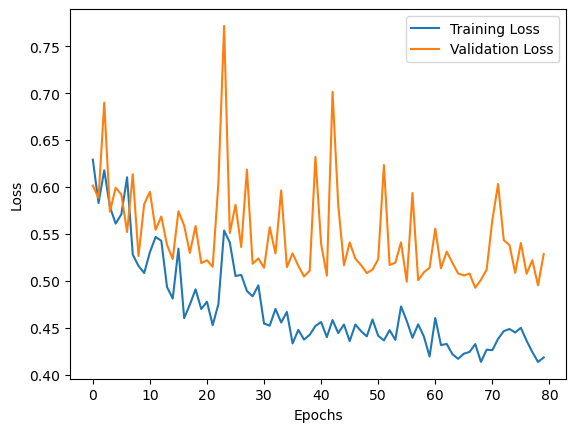

In [38]:
# Define the architecture of your neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
x_nn_train, x_nn_val, y_nn_train, y_nn_val = train_test_split(x_train, y_train, test_size=0.2)
history = model.fit(x_train, y_train, epochs=80, batch_size=32, validation_data=(x_nn_val, y_nn_val), callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
assessmentDF = pd.DataFrame({'Metric':['Accuracy','Precision','Recall','F1 Score'], 
                                 'Neural Network':[round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]})
assessmentDF

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,Metric,Neural Network
0,Accuracy,0.7328
1,Precision,0.6907
2,Recall,0.6262
3,F1 Score,0.6569
